# Playing with stop words

Nb common words seems to be an interesting feature.
But isn'it disturbed by common words like do, not, and which may precisely be common to many pairs this without any significance ?
So if remove stop words, nb common feature may have more signficance 

In [1]:
# Ugly incantation to make our 'framework' working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='remove_stopwords'
# Do a bit of checks before actually running code
UNITARY_TEST = True
print_alert('You will use environment %s' % EXPERIMENT)

## Build our initial features
* Nb words in question 1
* Nb words in question 2
* **abs(Nb words in question 1 - Nb words in question 2)** suppressed
* Nb common words
* Nb common words/nb words in question 1
* Nb common words/nb words in question 2
* Nb non common words in question 1
* Nb non common words in question 2
* Nb common words/(Nb words in question1 + Nb words in question2)

**Notes**
* Input data is not processed except for basic unicode clean
* Heavy to generate so result is cached
* This may be overkill as features will be eliminated but features are also generated for challenge data

In [2]:
def add_column_from_columns(dataframe,output_column_name,function):
    dataframe[output_column_name]=dataframe.progress_apply(function,axis=1)
    return dataframe[output_column_name]

def add_column_from_column(dataframe,output_column_name,input_column_name,function):
    dataframe[output_column_name]=dataframe[input_column_name].progress_apply(function)
    return dataframe[output_column_name]

def build_all_simple_features(dataframe):
    print_warning('Compute common_words between question1 & question2')
    add_column_from_column(dataframe,'nb_words_question1','question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'nb_words_question2','question2',lambda x: len(x.split()))

    #print_warning('Compute abs(Nb words in question 1 - Nb words in question 2)')
    #add_column_from_columns(dataframe,'abs(nb1-nb2)',lambda r: abs(r.nb_words_question1-r.nb_words_question2))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'common_words',lambda r: list(set(r.question1.split())&set(r.question2.split())))
    add_column_from_column(dataframe,'nb_common_words','common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question1',lambda r: r.nb_common_words/max(1,r.nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question2',lambda r: r.nb_common_words/max(1,r.nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'nb_words_question1-common_words',lambda r: len(list(set(r.question1.split())-set(r.common_words))))
    add_column_from_columns(dataframe,'nb_words_question2-common_words',lambda r: len(list(set(r.question2.split())-set(r.common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'nb_common_words/(nb_words_question1+nb_words_question2)',lambda r: r.nb_common_words/(r.nb_words_question1+r.nb_words_question2))
    dataframe=dataframe.drop(columns='common_words')
    return dataframe

In [3]:
prepare_environnement(EXPERIMENT)
train_dataframe=load_dataframe(CLEAN_TRAINING_DATA)
challenge_dataframe=load_dataframe(CLEAN_CHALLENGE_DATA)
print_section('Untouched input data has been loaded. Training: %d lines Challenge: %d lines' % (len(train_dataframe),len(challenge_dataframe)))

train_dataframe=load_or_build_dataframe('Training data + basic features','training_basic_features',build_all_simple_features,train_dataframe)
challenge_dataframe=load_or_build_dataframe('Challenge data + basic features','challenge_basic_features',build_all_simple_features,challenge_dataframe)

## We fix a mistake we did early : put everything in lower case !
So, we build a fresh new input data with basic features from scratch

In [4]:
def build_lower_all_simple_features(dataframe):
    print_info('lower case everything')
    dataframe['lower_question1'] = dataframe['question1'].str.lower()
    dataframe['lower_question2'] = dataframe['question2'].str.lower()
    print_warning('Compute common_words between question1 & question2')
    # Useless but More clear
    dataframe['lower_nb_words_question1'] = dataframe['nb_words_question1'].copy()
    dataframe['lower_nb_words_question2'] = dataframe['nb_words_question2'].copy()

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'lower_common_words',lambda r: list(set(r.lower_question1.split())&set(r.lower_question2.split())))
    add_column_from_column(dataframe,'lower_nb_common_words','lower_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question1',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question2',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'lower_nb_words_question1-common_words',lambda r: len(list(set(r.lower_question1.split())-set(r.lower_common_words))))
    add_column_from_columns(dataframe,'lower_nb_words_question2-common_words',lambda r: len(list(set(r.lower_question2.split())-set(r.lower_common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'lower_nb_common_words/(lower_nb_words_question1+lower_nb_words_question2)',lambda r: r.lower_nb_common_words/(r.lower_nb_words_question1+r.lower_nb_words_question2))
    dataframe=dataframe.drop(columns='lower_common_words')
    return dataframe

lower_train_dataframe = load_or_build_dataframe('Training data in lower case + basic features','training_lower_basic_features',build_lower_all_simple_features,train_dataframe)

if UNITARY_TEST:
    assert 'question1' in lower_train_dataframe.columns and 'lower_question1' in lower_train_dataframe.columns


### Did it change something ?


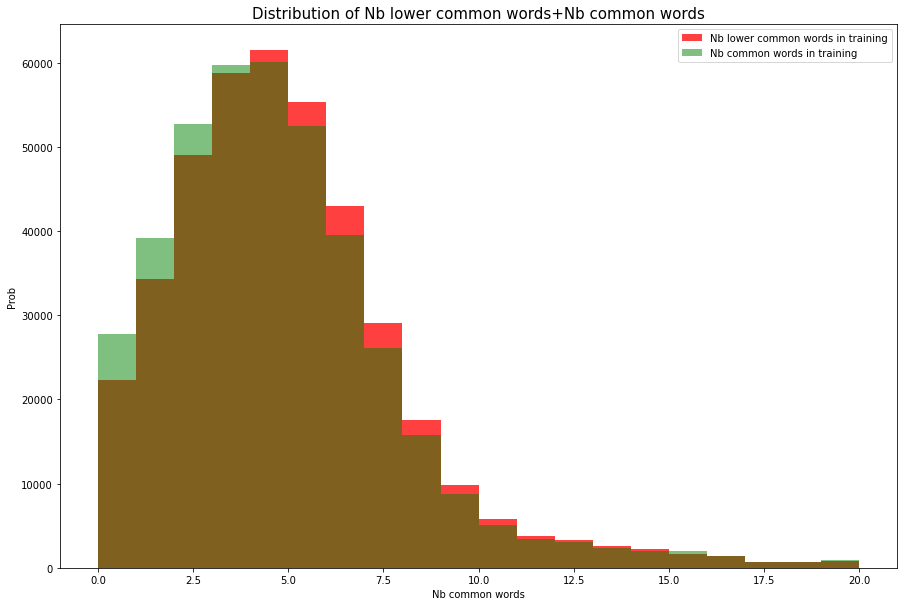

In [5]:
nb_changed = int(numpy.where(lower_train_dataframe['lower_nb_common_words']!=lower_train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words !!' % (nb_changed*100./len(lower_train_dataframe)))

from astropy.visualization import hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
plot.hist(lower_train_dataframe['lower_nb_common_words'],bins=20,range=[0,20],density=False,color='r',label="Nb lower common words in training",alpha=0.75,histtype='bar')
plot.hist(lower_train_dataframe['nb_common_words'],bins=20,range=[0,20],density=False,color='g',label="Nb common words in training",alpha=0.5,histtype='bar')
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

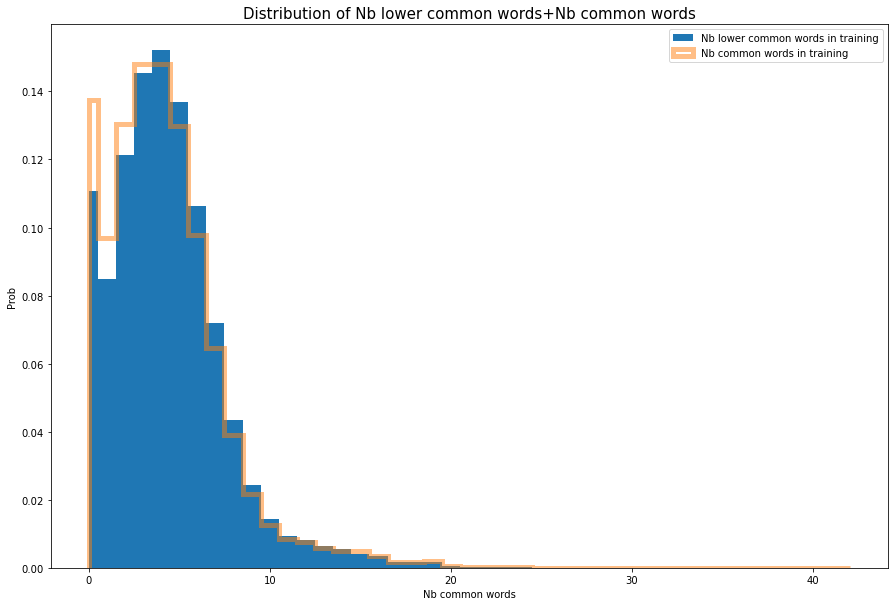

In [6]:
from astropy.visualization import hist as as_hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['lower_nb_common_words'],label="Nb lower common words in training",histtype='stepfilled',bins='blocks',density=True)
as_hist(lower_train_dataframe['nb_common_words'],label="Nb common words in training",histtype='step',alpha=0.5,lw=5,bins='blocks',density=True)
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Density')
plot.legend()




## Remove a first set of stopwords
### We start with nltk stopwords

In [9]:
from nltk.corpus import stopwords

def remove_stop_words(dataframe):
    print_warning('Remove stopwords from question 1 & question2')
    add_column_from_column(dataframe,'no_stopword_question1','lower_question1',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    add_column_from_column(dataframe,'no_stopword_question2','lower_question2',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    
    add_column_from_column(dataframe,'no_stopword_nb_words_question1','no_stopword_question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'no_stopword_nb_words_question2','no_stopword_question2',lambda x: len(x.split()))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'no_stopword_common_words',lambda r: list(set(r.no_stopword_question1.split())&set(r.no_stopword_question2.split())))
    add_column_from_column(dataframe,'no_stopword_nb_common_words','no_stopword_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question1',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question1))

    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question2',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'no_stopword_nb_words_question1-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question1.split())-set(r.no_stopword_common_words))))
    add_column_from_columns(dataframe,'no_stopword_nb_words_question2-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question2.split())-set(r.no_stopword_common_words))))

    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',lambda r: r.no_stopword_nb_common_words/(r.no_stopword_nb_words_question1+r.no_stopword_nb_words_question2))
    dataframe=dataframe.drop(columns='no_stopword_common_words')
    return dataframe

nltk_stopwords = set(stopwords.words('english'))
print_info( 'There is %d stopwords in nltk' % len(nltk_stopwords))

stopwords_train_dataframe = load_or_build_dataframe('Removing stopwords','training_basic_feature_no_stopwords',remove_stop_words,lower_train_dataframe)

nb_changed = int(numpy.where(stopwords_train_dataframe['no_stopword_nb_common_words']!=train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words !!' % (nb_changed*100./len(train_dataframe)))


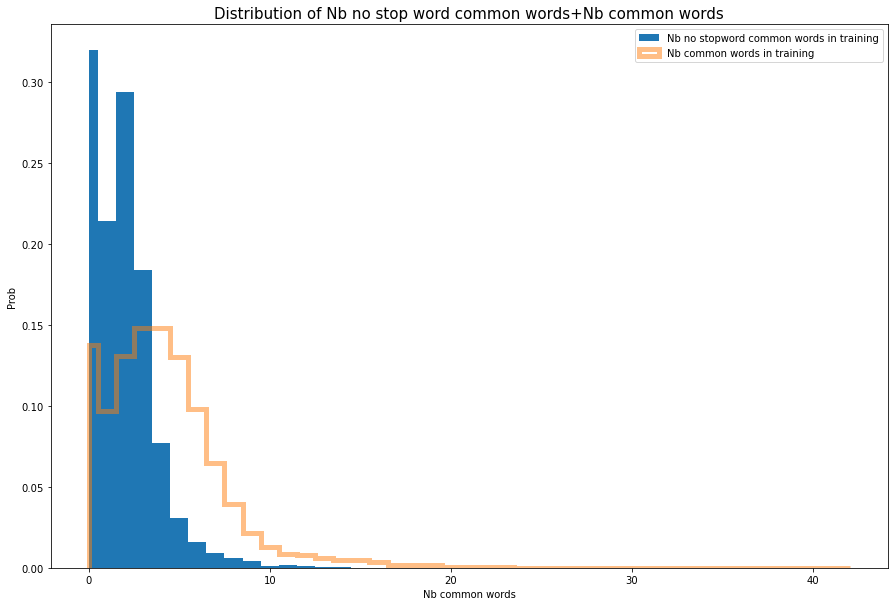

In [10]:
from astropy.visualization import hist as as_hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['no_stopword_nb_common_words'],label="Nb no stopword common words in training",histtype='stepfilled',bins='blocks',density=True)
as_hist(lower_train_dataframe['nb_common_words'],label="Nb common words in training",histtype='step',alpha=0.5,lw=5,bins='blocks',density=True)
plot.title('Distribution of Nb no stop word common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

## Challenge and training are not equivalent

% of duplicate in training is not the same in challenge !
We don't have the challenge's answer but by scoring a constant prediction and using logloss definition, we can guess the distribution of duplicates in challenge

It's 17.46 %

To fix that we can:

* duplicate some negative cases in training to match challenge distribution
* use weights : each case has a weight !=1 and all algorithms are supposed to be able to deal with that info
I choose to use weights (less memory needed ?)

In [ ]:
# return the weight for 0 and weight for 1 needed to rebalance dataframe like challenge
def balanced_weights(dataframe,expected_positive_ratio):
    current_positive_ratio = dataframe['is_duplicate'].sum()/len(dataframe)
    weight_for_negative = (1-expected_positive_ratio)/(1-current_positive_ratio)
    weight_for_positive = expected_positive_ratio/current_positive_ratio
    return weight_for_positive,weight_for_negative
    return 1,


CHALLENGE_DUPLICATE_PERCENT = 0.1746
print_warning('OUPS !! %% of duplicates in train is %.3f. In challenge it is %.3f %%' % (train_dataframe['is_duplicate'].sum()/len(train_dataframe),CHALLENGE_DUPLICATE_PERCENT))

# create a new 'weight' column to training dataset
# Do not forget to remove this column from features !!!
weight_for_1,weight_for_0 = balanced_weights(train_dataframe,CHALLENGE_DUPLICATE_PERCENT)
print_info('Weight for positive case %.3f' % weight_for_1)
print_info('Weight for negative case %.3f' % weight_for_0)
train_dataframe['weight'] = train_dataframe['is_duplicate'].map( {0:weight_for_0, 1:weight_for_1})

assert int(train_dataframe['weight'].sum()/len(train_dataframe)) == 1, "training dataset has not been properly rebalanced"
print_info("Training data set has been properly rebalanced")
print_info('Weights distribution:')
train_dataframe['weight'].describe()

## Compute AUC of these basic features and try to figure if there is a bit of information inside each one

ie is it helping to separate 1 from 0?

In [ ]:
from sklearn.metrics import roc_auc_score

def simple_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name])

def simple_weighted_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name],sample_weight=dataframe['weight'])

def show_AUC(dataframe,column_name):
    print_bullet('AUC %s: %f' % (column_name,simple_AUC(dataframe,column_name)))
    if 'weight' in dataframe.columns:
        print_bullet('Weighted AUC %f' % simple_weighted_AUC(dataframe,column_name))
    else:
        print_bullet('AUC %f' % simple_AUC(dataframe,column_name))
        

def display_simple_AUC(dataframe,column_name):
    palette = sns.color_palette()
    # Let multiplot_generator figure the size
    #plot.figure(figsize=(10, 7))
    plot.hist(dataframe[column_name][dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same',histtype='step')
    plot.hist(train_dataframe[column_name][dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.75,histtype='step')
    plot.title('AUC %s : %f' % (column_name,simple_AUC(dataframe,column_name)) , fontsize=10)
    plot.xlabel(column_name)
    plot.ylabel('Nb')
    plot.legend()



def show_all_simple_AUC(dataframe):
    all =  all_numeric_columns(dataframe)
    print_section( 'Show AUC on %d unique features' % len(all))
    for name in all:
        show_AUC(dataframe,name)
        yield
        display_simple_AUC(dataframe,name)
    print_done('Done')


def show_all_simple_AUC_in_grid(dataframe,nb_columns=2):
    multiplot_from_generator(show_all_simple_AUC(dataframe), nb_columns)

show_all_simple_AUC_in_grid(train_dataframe,nb_columns=2)

## OK Visualising these AUC is cool
Can we have some numbers ?

In [ ]:

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest,f_classif,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

def graph_relative_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    features_importances = 100.0 * (features_importances / features_importances.max())
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:-1:1]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Relative Importance')
    plot.title('Relative Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    sns.despine(left=True, bottom=True)
    plot.show()

def graph_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Importance')
    plot.title('Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    #sns.despine(left=True, bottom=True)
    plot.show()

def independant_features_analysis(name_data,input_df,target_df):
    train_df = input_df[all_numeric_columns(input_df)]
    target_df = target_df
    small = int(len(target_df)*0.05)
    small_train = train_df.sample(small,random_state=42)
    small_target = target_df.sample(small,random_state=42)
    small_weights = input_df[WEIGHT].sample(small,random_state=42)

    # be careful all_numeric will include also the target soon
    all_numeric = all_numeric_columns(input_df)
    print_section('Minimal analysis of numeric features of %s' % name_data)
    print_info('Nb features: %d' % len(all_numeric))
    print_info(str(all_numeric))
    print_info('Is there any null value ? %s' % input_df.isnull().any().any())

    compute_variances = feature_selection.VarianceThreshold()
    all_numeric.append('is_duplicate')
    variances = compute_variances.fit_transform(input_df[all_numeric])
    print_info('Is there any low variance feature ? %s' % str(variances.shape[1]!=len(all_numeric)))
    print_info('Here are the correlations to the target "is_duplicate"')
    correlation_matrix = input_df[all_numeric].corr().abs()
    print(correlation_matrix['is_duplicate'].nlargest(len(all_numeric)))

    correlation_matrix_without_is_duplicate = correlation_matrix['is_duplicate'][correlation_matrix['is_duplicate']<1]
    highest_correlated_feature = correlation_matrix_without_is_duplicate.nlargest(1).index[0]
    highest_correlation = correlation_matrix_without_is_duplicate.nlargest(1)[0]
    if highest_correlation >0.2:
        if highest_correlation < 0.5:
            print_warning('%s is the most correlated but %f is quite weak' % (highest_correlated_feature,highest_correlation))
        else:
            print_info('%s is the most correlated but %f is very weak' % (highest_correlated_feature,highest_correlation))
    else:
        print_alert('%s is the most correlated and %f is quite big' % (highest_correlated_feature,highest_correlation))
    plot.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix,annot=True,cbar=True,square=True,cmap='coolwarm',mask = numpy.triu(correlation_matrix))
    plot.show()

    # we remove is_duplicate
    all_numeric = all_numeric_columns(input_df)

    print_section('Here are the features that would be selected with a simple univariate analysis')
    start = time.time()
    for r in tqdm(range(1,len(all_numeric))):
        k_best = SelectKBest(score_func=f_classif,k=r)
        fit = k_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            univariate_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, univariate_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(univariate_features, small_target).feature_importances_
            graph_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    
    print_section('Here are the features that would be selected a priori from default Multinomial Naive Bayes')
    start = time.time()   
    mnb = MultinomialNB()
    best_from_model = feature_selection.SelectFromModel(mnb)
    fit = best_from_model.fit(small_train,small_target,sample_weight=small_weights)
    print(fit.get_support(indices=True))
    best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
    # transform train set so we can compute importances
    mnb_features = fit.transform(small_train)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc_scores = cross_val_score(rfc, mnb_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
    features_importance = rfc.fit(mnb_features, small_target).feature_importances_
    print(features_importance)
    print_info('features to keep :%s logloss %.4f %.4f' %(best_columns,-rfc_scores.mean(),rfc_scores.std()))
    graph_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    

    print_info('Try to keep x \% of variance with a PCA')
    print_alert('bug ?')
    start = time.time()
    for r in tqdm([.8,.9,.95]):
        acp = PCA(r)
        principal_components = acp.fit_transform(small_train)
        principal_df = pandas.DataFrame(principal_components).sample(small,random_state=42)
        rfc = RandomForestClassifier(n_estimators=100)
        rfc_scores = cross_val_score(rfc, principal_df, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
        features_importance = rfc.fit(principal_df, small_target).feature_importances_
        print_info('%% of variance %f:%s' %(r,'aie'))
        graph_feature_importance(features_importance,small_train.columns)
    print_done('Done',top=start)

    print_section('Here are the features that would be selected with a recursive feature elimination')
    start = time.time()
    print_alert('Doomed to fail : RFE does not support to transmit ,sample_weight=small_weights')
    print_alert('ix is waiting since 2016 ?')
    for r in tqdm(range(1,len(all_numeric))):
        mnb = MultinomialNB()
        recursive_best= feature_selection.RFE(mnb, n_features_to_select=r)
        fit = recursive_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            recursive_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, recursive_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(recursive_features, small_target).feature_importances_
            graph_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
   


independant_features_analysis('train',train_dataframe,train_dataframe['is_duplicate'])



## Here are the specs of algorithms to try

In [ ]:
# Here is our algorithm specification
import xgboost 

def learner_xgboost(algo_spec,input_train,target_train,input_test,target_test,weigth_train,weight_test,show=True):
    train_dm = xgboost.DMatrix(input_train, label = target_train, weight = weigth_train)
    if target_test is None:
        watchlist = [(train_dm, 'train')]
    else:
        validation_dm = xgboost.DMatrix(input_test, label = target_test,weight = weight_test)
        watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(algo_spec['params'], train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    return model


def predictor_xgboost(model,input_df,target_df):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    return prediction_df,prediction_proba_df



HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FIRST_TRY = {
    'alpha':[1e-10,1e-08,1e-06,1e-04,1e-02,1e-01,1.0]
    }

HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FINE_TUNING = {
    'alpha':[0.8e-10,0.9e-10,1.0e-10,1.1e-10,1.2e-10]
    }

ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH = {
    'algorithm': MultinomialNB,
    'searcher': RandomizedSearchCV,
    'hyper_parameters': {
        'alpha':[1e-10,1e-08,1e-06,1e-04,1e-02,1e-01,1.0]
    }
}

# Not very efficient ....
ALGORITHM_SPEC_COMPLEMENT_NB = {
    'algorithm': ComplementNB
}

ALGORITHM_SPEC_XGBOOST = {
    'learner': learner_xgboost,
    'predicter': predictor_xgboost,
    'params': {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta' : 0.02,
        'max_depth':3 
        }
}


# Naive Bayes

if UNITARY_TEST:
    print_section('Unitary test: one default Multinomial Naive Bayes model (80,20) & (100,0) using feature nb_words_question1')
    res = build_model_80_20_and_100_0(ALGORITHM_SPEC_COMPLEMENT_NB,train_dataframe,['nb_common_words/nb_words_question1', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)'],train_dataframe['is_duplicate'])
    #print(res)

# Unitary test
if UNITARY_TEST:
    print_section('Unitary test : optimize Multinomial Naive Bayes model with hyper_parameters (80,20) & (100,0) using feature nb_words_question1')
    res = build_model_80_20_and_100_0_hyper(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,train_dataframe,['nb_common_words/nb_words_question1', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)'],train_dataframe['is_duplicate'])
    #print(res)

if UNITARY_TEST:
    print_section('Unitary test : explore all features with default Multinomial Naive Bayes model on (80,20) & (100,0)')
    small_train = train_dataframe.sample(100, random_state=42)
    res = build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,small_train,small_train['is_duplicate'])
    #print(res)

if UNITARY_TEST:
    print_section('Unitary test : explore all features with default Multinomial Naive Bayes model on  (80,20) & (100,0) with cross validation')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,small_train,small_train['is_duplicate'])
    #print(res)

if UNITARY_TEST:
    print_section('Unitary test : explore all features with Multinomial Naive Bayes model & hyper parameters on (80,20) & (100,0) with hyper parameters')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_hyper_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,small_train,small_train['is_duplicate'])
    #print(res)

# XGBoost 
if UNITARY_TEST:
    print_section('Unitary test : explore all features with default xgboost model on (80,20) & (100,0)')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,small_train,small_train['is_duplicate'])
    #print(res)

if UNITARY_TEST:
    print_section('Unitary test : explore all features with xgboost model on  (80,20) & (100,0) with cross validation')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,small_train,small_train['is_duplicate'])
    #print(res)


In [ ]:
res.describe()

## Everything ready for exploration

Algorithms available now are:
* Multinomial Naive Bayes : good results facing its simplicity
* Complement Naive Bayes (poor results)

Strategies available are
* explore all combinations with an algorithm using fixed parameters
* explore all combinations with an algorithm using fixed parameters and with cross validation
* explore all combinations with an algorithm with hyper parameters

In [ ]:
HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FIRST_TRY = [1e-10,1e-08,1e-06,1e-04,1e-02,1e-01,1.0]

HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FINE_TUNING = [0.9e-10,0.95e-10,1.0e-10,1.05e-10,1.1e-10]

ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH = {
    'algorithm': MultinomialNB,
    'searcher': RandomizedSearchCV,
    'hyper_parameters': {
        'alpha':HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FINE_TUNING
    }
}

# Explore by building default models
default_multinomial_results = build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,train_dataframe,train_dataframe['is_duplicate'])


In [ ]:
cross_validation_multinomial_results = build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,train_dataframe,train_dataframe['is_duplicate'])


In [ ]:
hyper_multinomial_results = build_hyper_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,train_dataframe,train_dataframe['is_duplicate'])

## Explore a little bit our database

In [ ]:

def retrieve_model(results,model_key,kind):
    model = results['model_'+kind][model_key]
    column_names = results['columns'][model_key]
    return model,numpy.asarray(column_names)
    
def find_best_models(results,top,criteria,kind):
    if 'logloss' in criteria:
        return results.nsmallest(top,criteria+'_'+kind)
    else:
        return results.nlargest(top,criteria+'_'+kind)

if UNITARY_TEST:
    model,columns = retrieve_model(default_multinomial_results,'nb_common_words/nb_words_question1+nb_words_question1-common_words+nb_words_question2-common_words+nb_common_words/(nb_words_question1+nb_words_question2)','100_0')
    assert model is not None and len(columns)==4

In [ ]:
print_section('default Multinomial Naive Bayes')
display(default_multinomial_results.head())
print_section('Cross Validation Multinomial Naive Bayes')
display(cross_validation_multinomial_results.head())
print_section('Hyper parameters Multinomial Naive Bayes')
display(hyper_multinomial_results.head())





#find_best_models()

In [ ]:
print_section('3 Best defaults')
display(find_best_models(default_multinomial_results,3,'logloss_proba','80_20'))
print_section('3 Best cross validation')
display(find_best_models(cross_validation_multinomial_results,3,'logloss_proba','min'))
print_section('3 Best hyper parameters')
display(find_best_models(hyper_multinomial_results,3,'logloss_proba','80_20'))

In [ ]:
save_models_dict_to_excel(default_multinomial_results,file_name='default')
save_models_dict_to_excel(default_multinomial_results,file_name='cross')
save_models_dict_to_excel(default_multinomial_results,file_name='hyper')

In [ ]:
def show_docker_cp_command(absolute_file_name):
    return 'docker cp '+ DOCKER_IMAGE_NAME+':'+zip_file_name(absolute_file_name)+ ' c:\\temp\\outputs'

def show_kaggle_command(absolute_file_name):
    return 'kaggle competitions submit quora-question-pairs -f "' + zip_file_name(absolute_file_name) +'" -m "' + absolute_file_name +'"'

def show_docker_cp_commands(best_results):
    print_section('Use these commands to transfer apply results to windows host')
    for c in best_results['file_name'].apply(show_docker_cp_command):
        print_warning(c)
    print_done("")

def show_kaggle_commands(best_results):
    print_section('Use these commands to submit apply results to kaggle')
    for c in best_results['file_name'].apply(show_kaggle_command):
        print_warning(c)
    print_done("")
    
# return a dataframe fully ready to be converted in csv and published into kaggle
def simple_apply(results,model_key,input_dataframe,kind,proba=True):
    model,column_names=retrieve_model(results,model_key,kind)
    input_for_prediction=input_dataframe[column_names]
    res = pandas.DataFrame()
    if 'test_id' in input_dataframe.columns:
        res['test_id']=input_dataframe['test_id']
    if proba:
        res['is_duplicate']=pandas.Series(model.predict_proba(input_for_prediction)[:,1],name='is_duplicate')
    else:
        res['is_duplicate']=pandas.Series(model.predict(input_for_prediction),name='is_duplicate')
    return res  

def submit_model(results,criteria,kind,input_dataframe,model_key,label=None,proba=True,show_how_to_publish=True,kaggle=False):
    if label is None:
        absolute_file_name_csv = apply_absolute_file_name(criteria,kind,model_key)
    else:
        absolute_file_name_csv = apply_absolute_file_name(label+'_'+criteria,kind,model_key)
    print_info('Doing apply')
    prediction = simple_apply(results,model_key,input_dataframe,kind,proba)
    print_info('Generating CSV file')
    prediction.to_csv(absolute_file_name_csv,index=False)
    print_info('Zipping file')
    absolute_file_name_zip = zip_file_and_delete(absolute_file_name_csv)
    print_info('%s is ready' % absolute_file_name_csv)
    if show_how_to_publish:
        if kaggle:
            print_warning('Use this commands to submit apply results to kaggle')
            print_warning(show_kaggle_command(absolute_file_name_zip))
        else:
            print_warning('Use this command to transfer apply _results to Windows host')
            print_warning(show_docker_cp_command(absolute_file_name_csv))

if UNITARY_TEST:
    res = simple_apply(default_multinomial_results,'nb_common_words/nb_words_question1+nb_words_question1-common_words+nb_words_question2-common_words+nb_common_words/(nb_words_question1+nb_words_question2)',challenge_dataframe,'80_20')
    assert len(res)==len(challenge_dataframe)
    display(res.head())

if UNITARY_TEST:
    submit_model(
        default_multinomial_results,
        'logloss_proba',
        '80_20',
        challenge_dataframe.sample(1000,random_state=42),
        'nb_common_words/nb_words_question1+nb_words_question1-common_words+nb_words_question2-common_words+nb_common_words/(nb_words_question1+nb_words_question2)',
        label='_TODEL_')
    

### Let's try XGBoost

In [ ]:
default_xgboost_results = build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,train_dataframe,train_dataframe['is_duplicate'])

In [ ]:
cross_validation_xgboost_results = build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,train_dataframe,train_dataframe['is_duplicate'])

Manual code for sandboxing before launching big stuff

In [ ]:
import xgboost 

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.02,
    'max_depth':3 
    }

def build_XGBoost_model_80_20(training,target,column_names,show=True):
    suffix='80_20'
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT])
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params, train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_input_test,target_test,suffix,sample_weight = input_test[WEIGHT],show=show)
    infos.update({add_suffix('time',suffix):duration})
    if show:      
        print_model_infos(suffix,PRINT_INFOS_ON_MODEL,infos,suffix)
    return  infos

def build_XGBoost_model_100_0(training,target,column_names,show=True):
    suffix='100_0'
    final_train = training[list(column_names)]
    final_target = target
    final_weight = training[WEIGHT]

    train_dm = xgboost.DMatrix(final_train, label = final_target, weight = final_weight)
    watchlist = [(train_dm, 'train')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params, train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_train,final_target,suffix,sample_weight = final_weight,show=show)
    infos.update({add_suffix('time',suffix):duration})
    if show:      
        print_model_infos(suffix,PRINT_INFOS_ON_MODEL,infos,suffix)
    return  infos

def compute_metrics_model_xgboost(model,input_df,target_df,suffix,sample_weight = None,show = True):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    #prediction_proba_df = model.predict_proba(final_input,ntree_limit=model.best_ntree_limit)
    res = metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight,output_dict=True)
    accuracy = res['accuracy']
    score = res['weighted avg']['f1-score']
    logloss_proba = metrics.log_loss(target_df,prediction_proba_df,sample_weight = sample_weight)
    if show:
        print('Classification report on %s' % suffix)
        print(metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight))
    return add_suffix_to_keys(
            {
             'accuracy':accuracy,
             'score':score,
             'logloss_proba':logloss_proba,
             'model':model
           },
           suffix)

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')

if UNITARY_TEST:
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 100_0')
    res = build_XGBoost_model_100_0(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

if UNITARY_TEST:
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 80_20')
    res = build_XGBoost_model_80_20(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)
    #xgboost.plot_importance(res['model'])
    #xgboost.to_graphviz(model,num_trees=2)


In [ ]:
import xgboost 

def learner_xgboost(algo_spec,input_train,target_train,input_test,target_test,weigth_train,weight_test,show=True):
    train_dm = xgboost.DMatrix(input_train, label = target_train, weight = weigth_train)
    if target_test is None:
        watchlist = [(train_dm, 'train')]
    else:
        validation_dm = xgboost.DMatrix(input_test, label = target_test,weight = weight_test)
        watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(algo_spec['params'], train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    return model


def predictor_xgboost(model,input_df,target_df):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    return prediction_df,prediction_proba_df


ALGORITHM_SPEC_XGBOOST = {
    'learner': learner_xgboost,
    'predicter': predictor_xgboost,
    'params': {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta' : 0.02,
        'max_depth':3 
        }
}

if UNITARY_TEST:
    print_section('Unitary test : explore all features with default xgboost model on (80,20) & (100,0)')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,small_train,small_train['is_duplicate'])
    res

if UNITARY_TEST:
    print_section('Unitary test : explore all features with xgboost model on  (80,20) & (100,0) with cross validation')
    small_train = train_dataframe.sample(100,random_state=42)
    res = build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,small_train,small_train['is_duplicate'])
    res